In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/tisheedesh/Project/main/Data/data_processed.csv').drop(['Unnamed: 0'], axis=1)

Выведем базовую describe-таблицу количественных характеристик датасета:

In [4]:
df.describe()

,Примерный вес,Проба,Количество,Вес,Количество 2,Вес 2,Ширина кольца,Ширина,Высота,Номер страницы,Цена со скидкой,Цена без скидки
count,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8.492000e+03,8.492000e+03
mean,2.269896,669.340556,7.772374,0.690260,4.677343,0.154182,2.249812,7.606000,3.755768,73.304522,4.208324e+04,9.857831e+04
std,1.229823,158.022857,18.015935,1.281404,10.621306,0.564410,1.227961,3.367311,1.372621,41.798467,8.773680e+04,1.978102e+05
min,0.170000,375.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.400000e+02,9.900000e+02
25%,1.490000,585.000000,1.000000,0.065000,0.000000,0.000000,2.000000,6.000000,3.755826,38.000000,5.850000e+03,1.299000e+04
50%,1.980000,585.000000,1.000000,0.267000,0.000000,0.000000,2.000000,7.605504,3.755826,73.000000,2.160000e+04,5.299000e+04
75%,2.680000,925.000000,6.000000,0.752000,4.000000,0.102000,2.249783,7.605504,4.000000,110.000000,4.200000e+04,9.999000e+04
max,14.600000,1000.000000,253.000000,18.705000,143.000000,11.099000,20.000000,110.000000,32.000000,146.000000,2.747250e+06,6.104990e+06


Интересно, что максимальное значение ширины кольца равно 110 мм. Разобравшись, мы выяснили, что на странице этого кольца действительно указано значение 110 мм - явная ошибка на сайте, т.к. ширина аналогичного кольца из другого металла составляет 10 мм. На всякий случай прикрепляем ссылку на кольцо:

In [5]:
print('https://sokolov.ru/jewelry-catalog/product/' + df.loc[df['Ширина'] == df['Ширина'].max(), 'Артикул'].values[0])

https://sokolov.ru/jewelry-catalog/product/2011268


Посмотрим на корреляционную таблицу количественных признаков:

<Axes: >

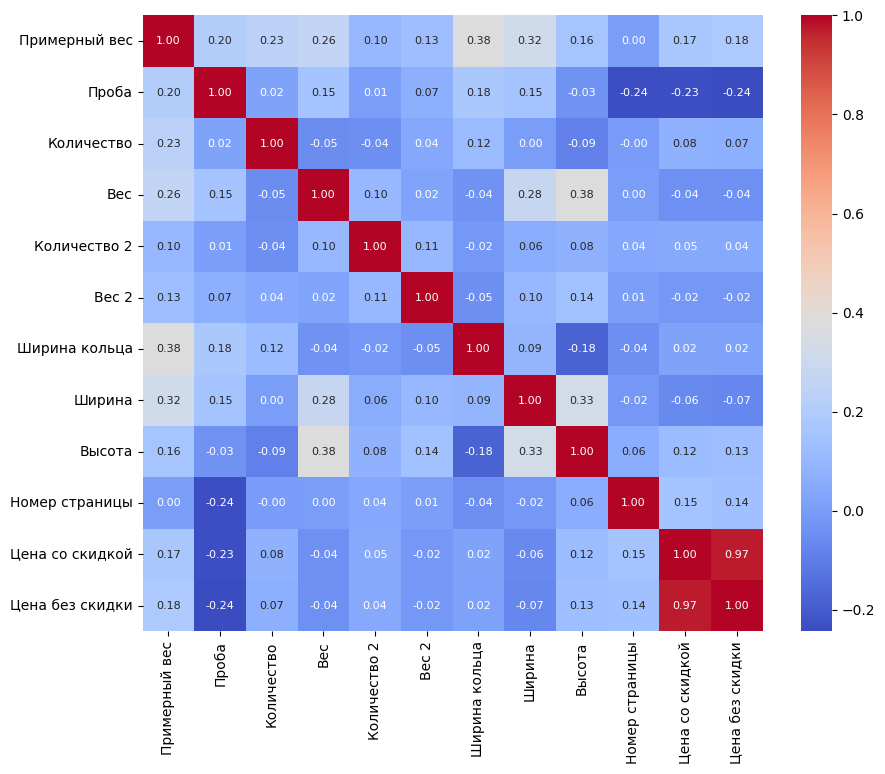

In [6]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt="0.2f", annot_kws={"size":8})

Высокая положительная корреляция наблюдается только у цены со скидкой и без скидки, что неудивительно. Больше удивляет то, что для всех остальных значений максимальное значение попарной корреляции равно 0.38, при этом корреляция признаков с ценой довольно слабая - максимум 0.24 по модулю. Будем разбираться.

In [7]:
df.columns

Index(['Артикул', 'Для кого', 'Примерный вес', 'Тип металла', 'Проба',
       'Покрытие', 'Тип вставки', 'Форма вставки', 'Количество', 'Цвет', 'Вес',
       'Тип вставки 2', 'Форма вставки 2', 'Количество 2', 'Цвет 2', 'Вес 2',
       'Ширина кольца', 'Ширина', 'Высота', 'Номер страницы',
       'Цена со скидкой', 'Цена без скидки'],
      dtype='object')

Посмотрим на все качественные характеристики, а именно определим, какие значения встречаются и в каком количестве колец:

In [8]:
for c in df.drop(['Артикул', 'Примерный вес', 'Количество', 'Вес', 'Количество 2', 'Вес 2', 'Ширина кольца', 'Ширина', 'Высота', 'Номер страницы',
                'Цена со скидкой', 'Цена без скидки'], axis=1).columns:
    display(df[c].value_counts())
    print()

Для кого
Для женщин                           7988
Для женщин, Для мужчин, Унисекс       243
Для мужчин                            208
Неизвестно                             24
Для детей                              22
Для женщин, Для мужчин, Для детей       7
Name: count, dtype: int64

Тип металла
Красное золото            3562
Родированное серебро      1796
Белое золото              1420
Жёлтое золото              735
Комбинированное золото     526
Золочёное серебро          285
Чернёное серебро           100
Сталь                       25
Серебро                     23
Платина                     18
Золото                       2
Name: count, dtype: int64

Проба
585.0     5994
925.0     2204
375.0      244
1000.0      25
950.0       18
750.0        7
Name: count, dtype: int64

Покрытие
Родирование                             4804
Неизвестно                              2980
Золочение                                181
Алмазная грань,  Родирование             132
Эмаль                                    131
Золочение,  Родирование                  129
Алмазная грань                            55
Родирование,  Эмаль                       39
Золочение,  Эмаль                         13
Гравировка                                 9
Золочение,  Родирование,  Эмаль            8
Гравировка,  Родирование                   6
Чернение                                   2
Гравировка,  Золочение                     1
Лазерная обработка,  Родирование           1
Алмазная грань,  Родирование,  Эмаль       1
Name: count, dtype: int64

Тип вставки
Фианит                             2728
Бриллиант (природный)              2337
Без вставок                         978
Топаз                               378
Гранат                              190
Сапфир                              185
Изумруд натуральный                 129
Аметист                             125
Лондон топаз                        122
Жемчуг натуральный                  120
Корунд                              118
Эмаль                               117
Бриллиант выращенный                113
Ситалл                              107
Агат                                 98
Рубин                                73
Раухтопаз                            71
Черный бриллиант                     71
Коньячный бриллиант                  50
Горный хрусталь                      49
Кварц                                43
Жемчуг (синт.)                       41
Кристалл                             36
Гидротермальный изумруд (синт.)      31
Наношпинель                 

Форма вставки
Круг           5836
Без вставок     978
Овал            513
Груша           302
Октагон         150
Маркиз          135
Неизвестно      128
Квадрат         116
Багет            99
Триллион         73
Сердце           67
Антик            44
Принцесса        25
Волна            17
Кушон             7
Шар               2
Name: count, dtype: int64

Цвет
Бесцветный     5145
Без вставок     978
Голубой         522
Зелёный         363
Красный         315
Синий           294
Чёрный          176
Сиреневый       158
Белый           142
Неизвестно      139
Коричневый       91
Розовый          70
Коньячный        50
Жёлтый           49
Name: count, dtype: int64

Тип вставки 2
Без вставок                        5081
Фианит                             1821
Бриллиант (природный)               906
Танзанит                             94
Эмаль                                92
Топаз                                69
Корунд                               58
Бриллиант выращенный                 43
Гранат                               43
Жемчуг натуральный                   43
Лондон топаз                         27
Гидротермальный изумруд (синт.)      23
Коньячный бриллиант                  22
Хризолит                             20
Агат                                 18
Перламутр                            14
Черный бриллиант                     11
Цитрин                               11
Сапфир                               10
Празиолит                            10
Кварц                                 9
Аквамарин                             8
Янтарь прессованный                   7
Турмалин                              7
Изумруд натуральный       

Форма вставки 2
Без вставок    5081
Круг           2879
Овал            127
Неизвестно      108
Груша            96
Маркиз           48
Октагон          46
Квадрат          30
Антик            20
Триллион         18
Сердце           13
Багет            12
Кушон             6
Волна             6
Ромб              1
Шар               1
Name: count, dtype: int64

Цвет 2
Без вставок    5081
Бесцветный     2582
Неизвестно      122
Голубой         119
Сиреневый       118
Зелёный         113
Синий            83
Белый            64
Красный          62
Чёрный           61
Жёлтый           33
Коньячный        23
Коричневый       17
Розовый          14
Name: count, dtype: int64

Как видно, большая часть качественных признаков имеет крайне редко встречающиеся значения на выборке (так, например, среди всех типов вставок авантюрин встречается только в одном кольце). Такие признаки нужно как-то обработать.

Учитывая размер выборки, нашим первоначальным exploratory-решением стало удаление колец, имеющих такие значения качественных признаков - `тип вставки` и `тип вставки 2`, которые встречаются менее чем у 100 других колец (т.е. около 1-2% выборки). Такие кольца на данном этапе мы считаем выбросами. Значение в 100 единиц было взято на основе анализа наиболее насыщенной разнообразием качественной характиристики - `типа вставки`.

In [9]:
# df = df.drop(df.loc[df['Тип вставки 2'] != 'Без вставок'].index)
# df = df.drop(['Тип вставки 2', 'Форма вставки 2', 'Количество 2', 'Цвет 2', 'Вес 2'], axis=1)

In [10]:
for c in ['Тип вставки', 'Тип вставки 2']:
    df = df.loc[~df[c].isin(df[c].value_counts()[(df[c].value_counts() < 100)].index)]

In [11]:
for c in df.drop(['Артикул', 'Примерный вес', 'Количество', 'Вес', 'Количество 2', 'Вес 2', 'Ширина кольца', 'Ширина', 'Высота', 'Номер страницы',
                'Цена со скидкой', 'Цена без скидки'], axis=1).columns:
    display(df[c].value_counts())
    print()
df.shape

Для кого
Для женщин                           6718
Для женщин, Для мужчин, Унисекс       235
Для мужчин                            144
Для детей                              17
Неизвестно                             12
Для женщин, Для мужчин, Для детей       7
Name: count, dtype: int64

Тип металла
Красное золото            2854
Родированное серебро      1527
Белое золото              1225
Жёлтое золото              653
Комбинированное золото     499
Золочёное серебро          230
Чернёное серебро            89
Сталь                       25
Платина                     18
Серебро                     11
Золото                       2
Name: count, dtype: int64

Проба
585.0     4999
925.0     1857
375.0      227
1000.0      25
950.0       18
750.0        7
Name: count, dtype: int64

Покрытие
Родирование                             4217
Неизвестно                              2367
Золочение                                143
Алмазная грань,  Родирование             128
Золочение,  Родирование                   98
Эмаль                                     81
Алмазная грань                            54
Родирование,  Эмаль                       11
Гравировка                                 9
Золочение,  Эмаль                          7
Золочение,  Родирование,  Эмаль            7
Гравировка,  Родирование                   6
Чернение                                   2
Гравировка,  Золочение                     1
Лазерная обработка,  Родирование           1
Алмазная грань,  Родирование,  Эмаль       1
Name: count, dtype: int64

Тип вставки
Фианит                   2634
Бриллиант (природный)    1953
Без вставок               978
Топаз                     359
Сапфир                    172
Гранат                    164
Лондон топаз              122
Изумруд натуральный       120
Жемчуг натуральный        118
Эмаль                     117
Аметист                   113
Корунд                    112
Ситалл                    100
Бриллиант выращенный       71
Name: count, dtype: int64

Форма вставки
Круг           4933
Без вставок     978
Овал            356
Груша           204
Неизвестно      123
Октагон         115
Маркиз          105
Квадрат          83
Багет            74
Сердце           63
Триллион         40
Антик            26
Принцесса        23
Волна             8
Кушон             2
Name: count, dtype: int64

Цвет
Бесцветный     4573
Без вставок     978
Голубой         490
Синий           257
Красный         210
Зелёный         180
Сиреневый       122
Неизвестно      115
Белый           114
Розовый          33
Жёлтый           32
Чёрный           29
Name: count, dtype: int64

Тип вставки 2
Без вставок              4705
Фианит                   1625
Бриллиант (природный)     803
Name: count, dtype: int64

Форма вставки 2
Без вставок    4705
Круг           2289
Груша            26
Маркиз           25
Овал             22
Октагон          20
Квадрат          16
Неизвестно        9
Сердце            8
Багет             4
Триллион          4
Волна             4
Антик             1
Name: count, dtype: int64

Цвет 2
Без вставок    4705
Бесцветный     2275
Чёрный           29
Зелёный          25
Синий            25
Голубой          17
Сиреневый        16
Жёлтый           13
Розовый           9
Неизвестно        9
Красный           7
Коричневый        2
Коньячный         1
Name: count, dtype: int64

(7133, 22)

Стало чуть лучше. Посмотрим на полученное описание значений кач. характеристик. Начнём с металлов:

Можно заметить, что серебро в выборке представлено в четырёх вариантах: `Родированное серебро`, `Золочёное серебро`, `Чернёное серебро ` и просто `Серебро`, при этом среди значений признака `Покрытие` встречаются такие, как `Родирование`, `Золочение` и `Чернение`, что наталкивает на следующую мысль: Серебро как тип металла на самом деле одно, просто из-за покрытия называется по-разному. Проверим это, проанализировав указанные покрытия для "нестандартного" серебра:

In [12]:
display(df.loc[df['Тип металла'] == 'Родированное серебро', 'Покрытие'].value_counts())
print()

display(df.loc[df['Тип металла'] == 'Золочёное серебро', 'Покрытие'].value_counts())
print()

display(df.loc[df['Тип металла'] == 'Чернёное серебро', 'Покрытие'].value_counts())
print()

Покрытие
Неизвестно                          879
Родирование                         514
Эмаль                                79
Золочение,  Родирование              23
Родирование,  Эмаль                  10
Алмазная грань                        7
Гравировка                            7
Золочение,  Родирование,  Эмаль       4
Золочение                             3
Лазерная обработка,  Родирование      1
Name: count, dtype: int64

Покрытие
Золочение                          130
Золочение,  Родирование             66
Неизвестно                          24
Золочение,  Эмаль                    5
Золочение,  Родирование,  Эмаль      3
Гравировка                           1
Гравировка,  Золочение               1
Name: count, dtype: int64

Покрытие
Неизвестно                              83
Золочение                                3
Чернение                                 2
Алмазная грань,  Родирование,  Эмаль     1
Name: count, dtype: int64

Так получилось, что `родированное серебро` не обязательно `родированное`, как и с остальными видами серебра. Грустно, но что поделать.

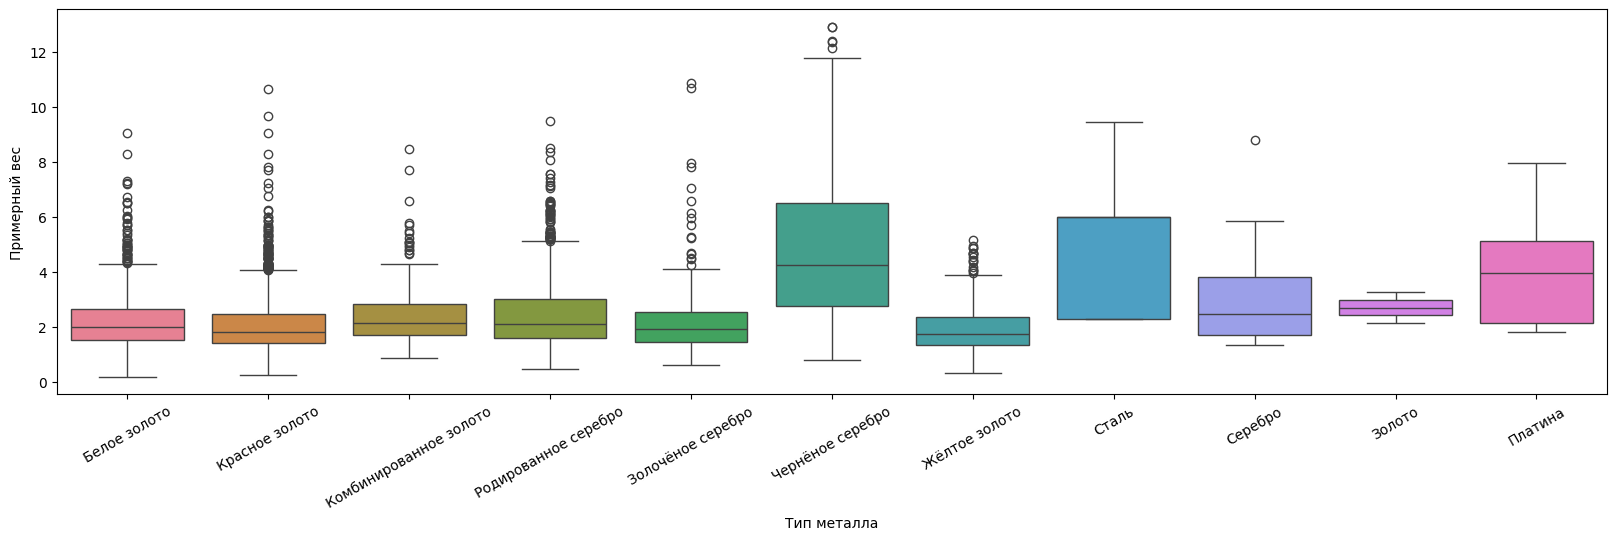

In [15]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.boxplot(df, x='Тип металла', y='Примерный вес', hue='Тип металла')
plt.xticks(rotation=30)
plt.show()

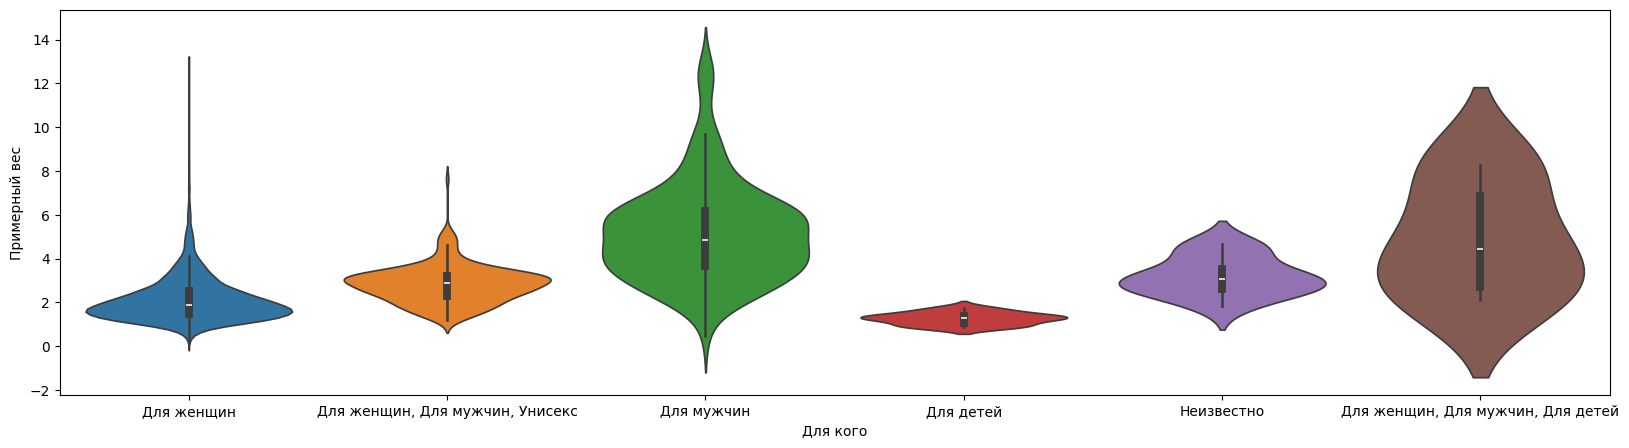

In [17]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.violinplot(df, x='Для кого', y='Примерный вес', hue='Для кого')
plt.show()

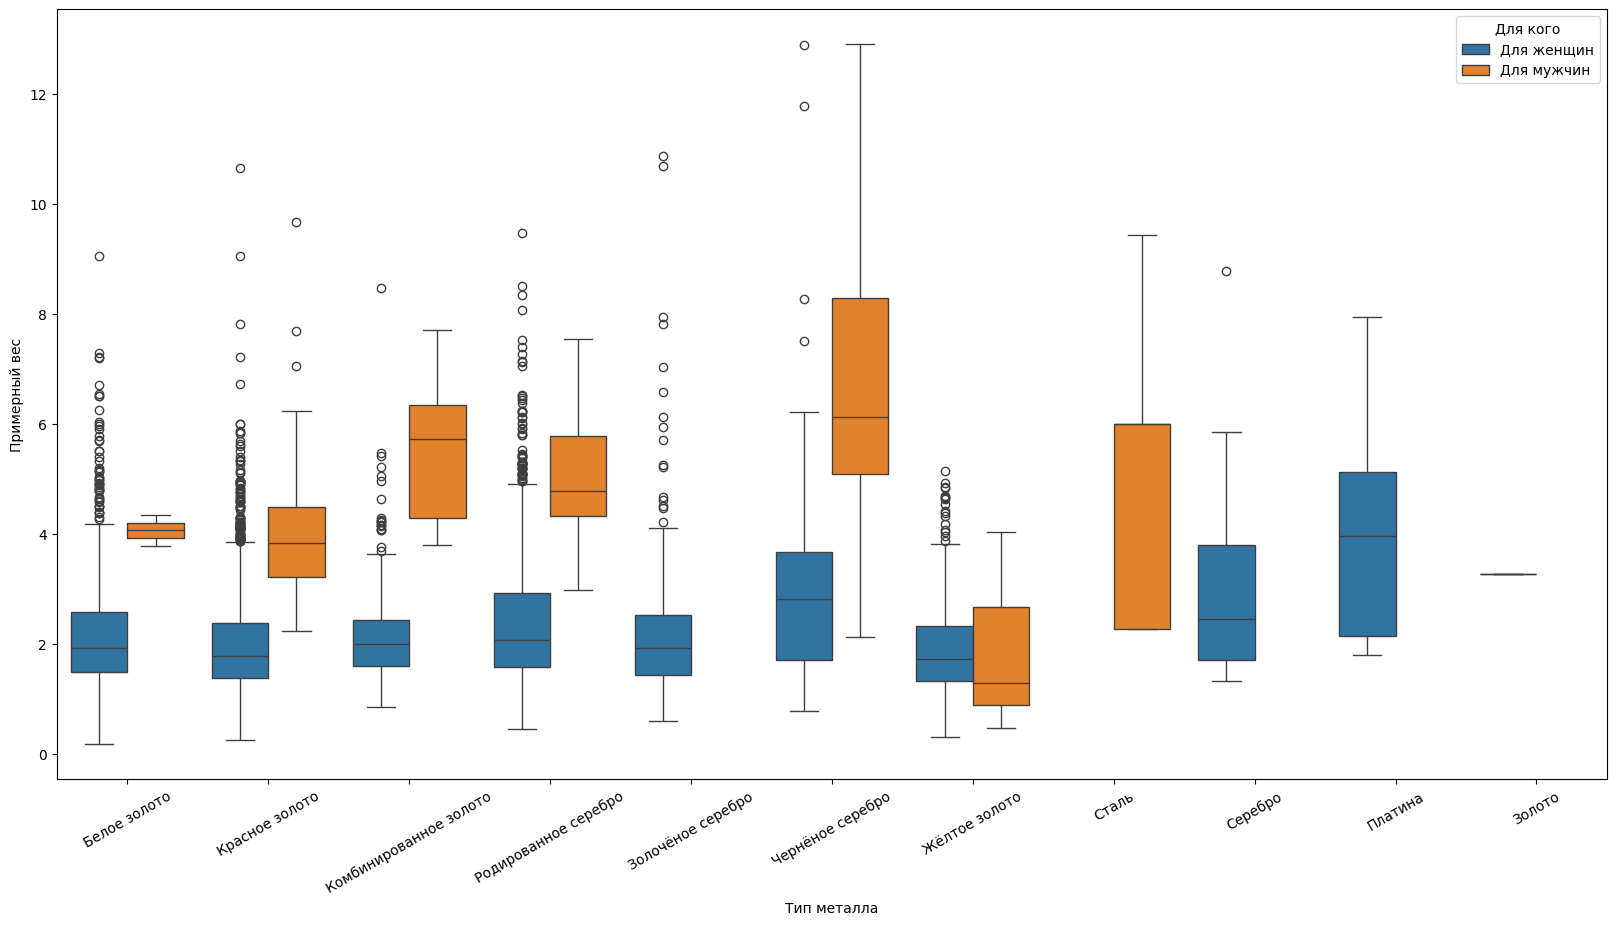

In [18]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.boxplot(df.loc[(df['Для кого'] == 'Для мужчин') | (df['Для кого'] == 'Для женщин')], x='Тип металла', y='Примерный вес', hue='Для кого')
plt.xticks(rotation=30)
plt.show()

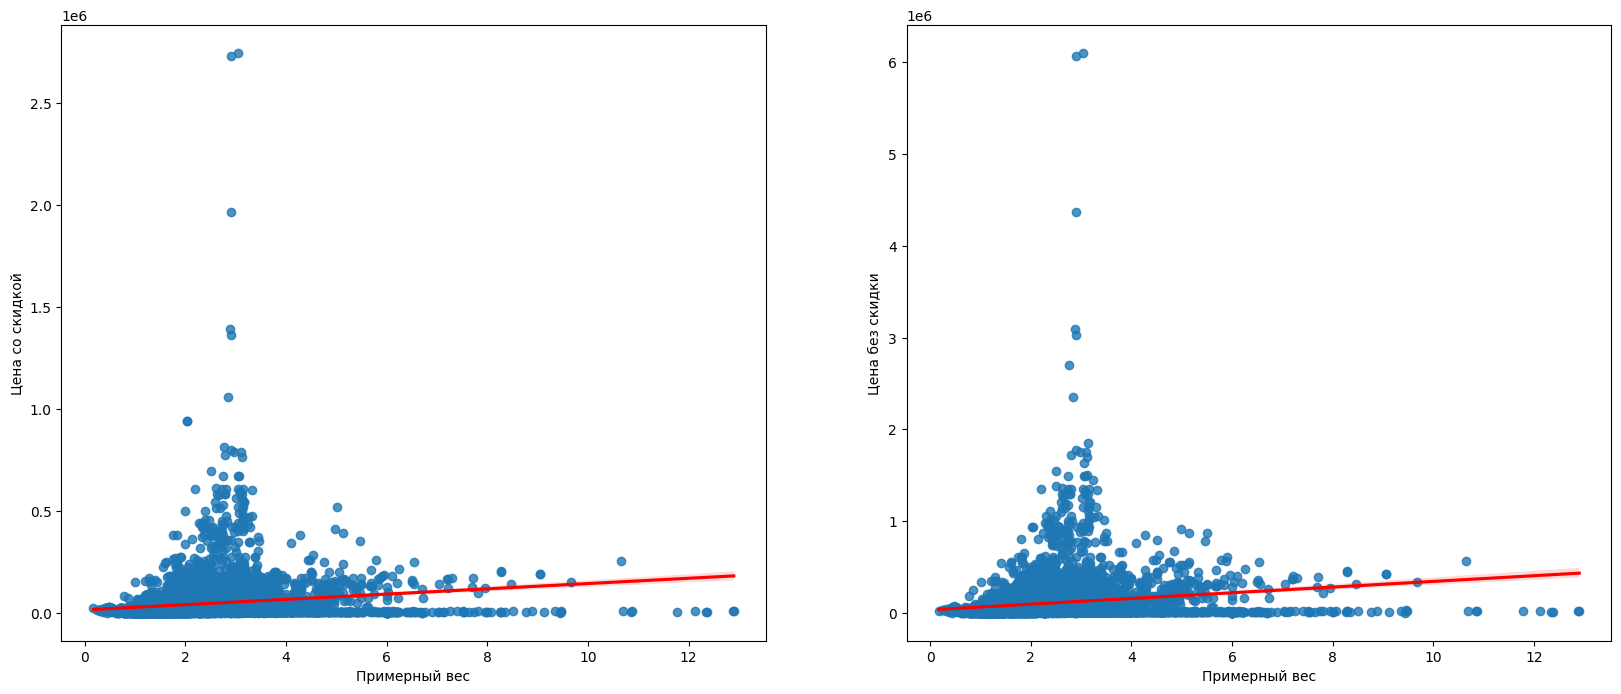

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.regplot(df, y='Цена со скидкой', x='Примерный вес', line_kws={'color' : 'red'}, ax=ax[0])
sns.regplot(df, y='Цена без скидки', x='Примерный вес', line_kws={'color' : 'red'}, ax=ax[1])
plt.show()

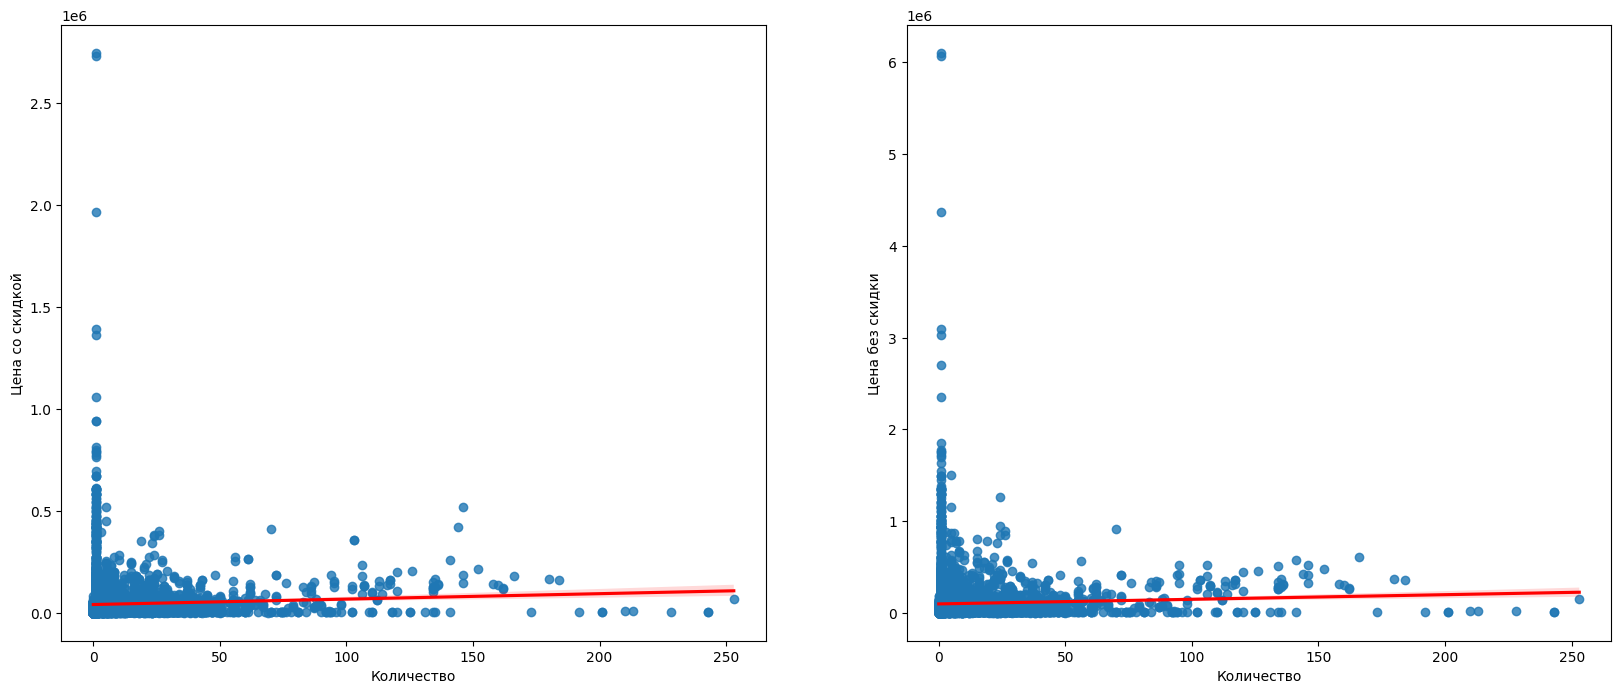

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.regplot(df, y='Цена со скидкой', x='Количество', line_kws={'color' : 'red'}, ax=ax[0])
sns.regplot(df, y='Цена без скидки', x='Количество', line_kws={'color' : 'red'}, ax=ax[1])
plt.show()

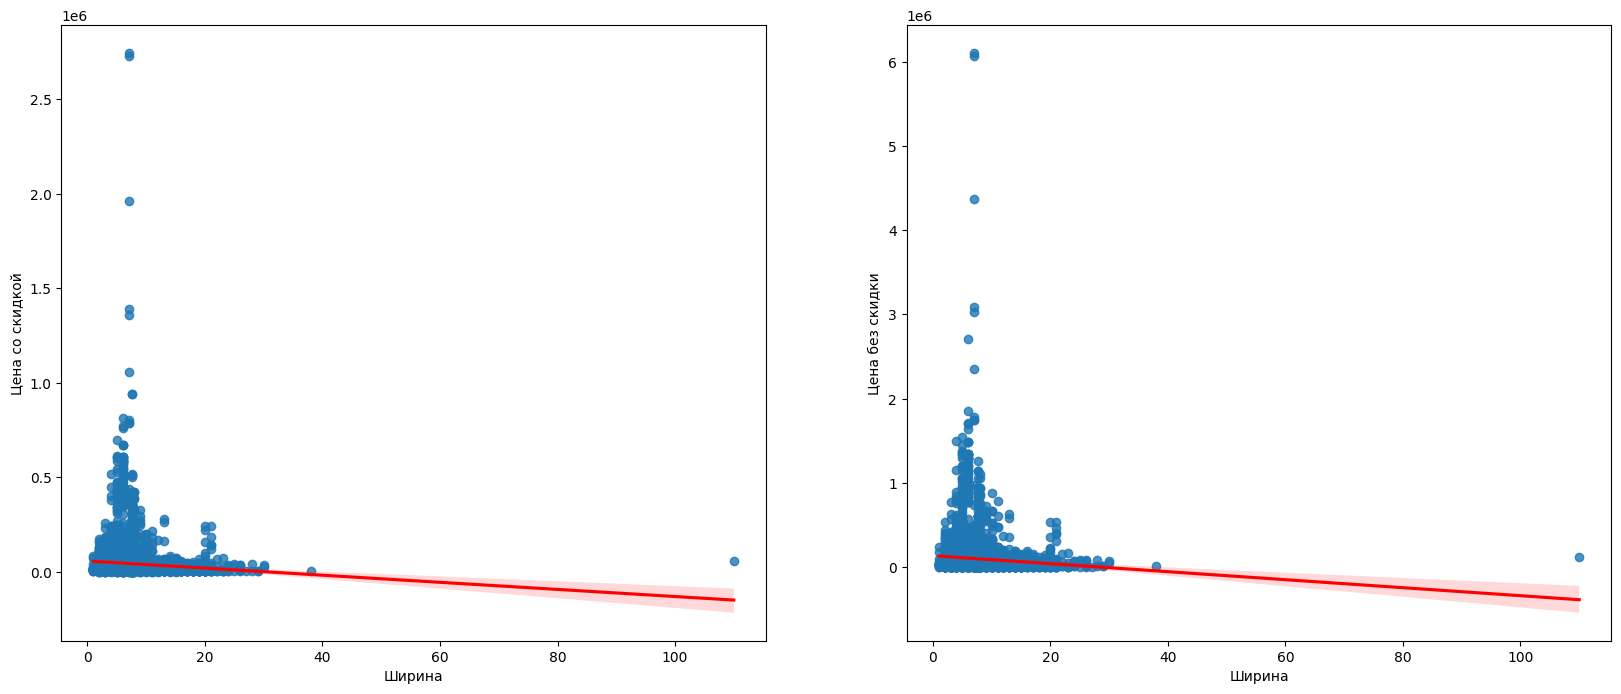

In [ ]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.regplot(df, y='Цена со скидкой', x='Ширина', line_kws={'color' : 'red'}, ax=ax[0])
sns.regplot(df, y='Цена без скидки', x='Ширина', line_kws={'color' : 'red'}, ax=ax[1])
plt.show()

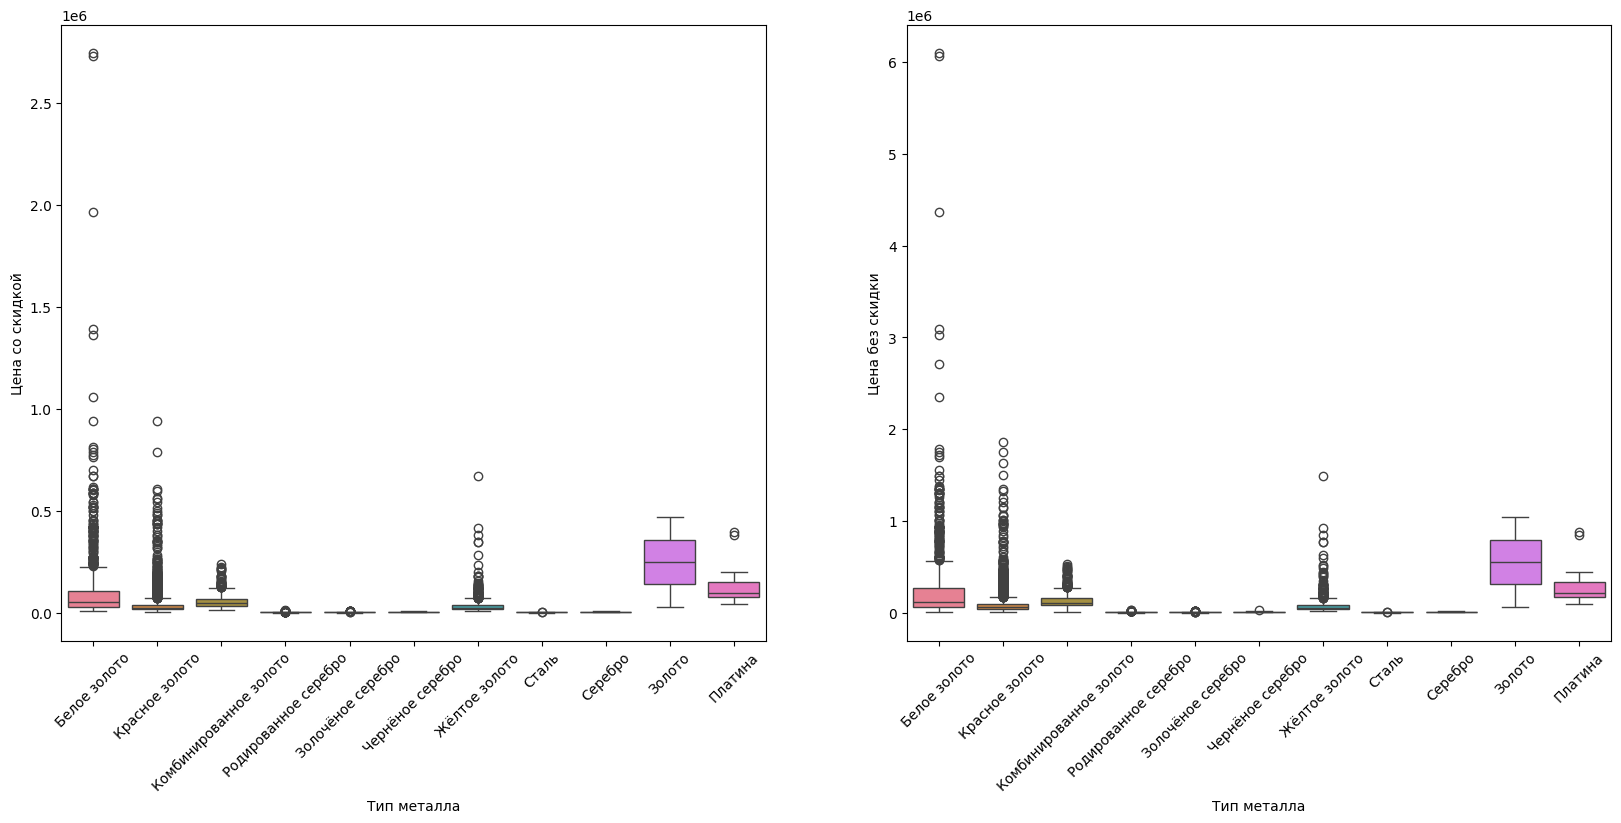

In [28]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.boxplot(df, y='Цена со скидкой', x='Тип металла', hue='Тип металла', ax=ax[0])
ax[0].tick_params(axis='x', labelrotation = 45)
sns.boxplot(df, y='Цена без скидки', x='Тип металла', hue='Тип металла', ax=ax[1])
ax[1].tick_params(axis='x', labelrotation = 45)
plt.show()

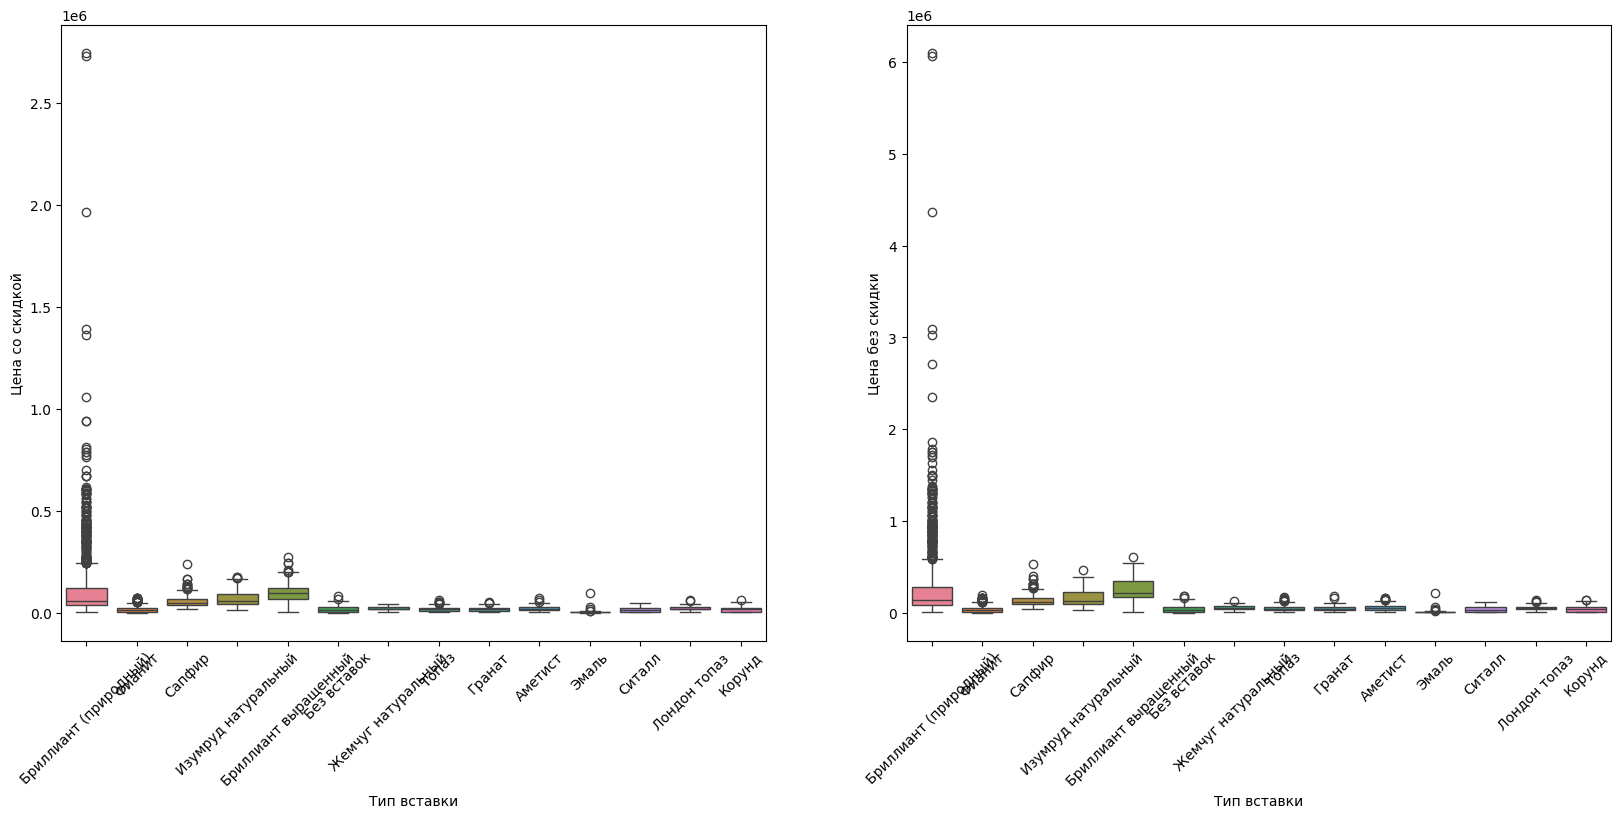

In [29]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.boxplot(df, y='Цена со скидкой', x='Тип вставки', hue='Тип вставки', ax=ax[0])
ax[0].tick_params(axis='x', labelrotation = 45)
sns.boxplot(df, y='Цена без скидки', x='Тип вставки', hue='Тип вставки', ax=ax[1])
ax[1].tick_params(axis='x', labelrotation = 45)
plt.show()